In [36]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import itertools

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
# from proc_revisions.plotting import *
# from proc_revisions.mane_utils import *

In [37]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [38]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]
pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='human')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]

sr_ab = '../'+config['sr']['ab']


ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'
go_gene_subset = 'protein_coding'

m_ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='mouse')[0]
m_filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='mouse')[0]
m_read_annot = od+expand(config['lr']['talon']['full_annot'], species='mouse')[0]
m_t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='mouse')[0]
m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]
m_swan_file = od+expand(config['lr']['swan']['sg'], species='mouse')[0]
m_cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='mouse', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='mouse')[0]
m_major_isos = od+expand(config['lr']['analysis']['major_isos'], species='mouse', obs_col='sample')[0]
m_pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='mouse', obs_col='sample')[0]
m_pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='mouse')[0]


m_ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='mouse')[0]
m_ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='mouse')[0]


orth_table = '../../proc_revisions/ref/biomart_human_to_mouse.tsv'


mouse_ver = 'vM25_cerberus'

In [39]:
sns.set_context('paper', font_scale=1.8)
c_dict, order = get_biosample_colors()

In [40]:
ab_df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(ab_df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)
det_df = get_det_table(ab_df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Calculating iso TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 138 total libraries


In [41]:
# get all pairwise sets of tech reps
meta_df = pd.read_csv(lib_meta, sep='\t')
meta_df['biorep'] = meta_df['dataset'].str.rsplit('_', n=1, expand=True)[0]

all_pairs = []
for b in meta_df['biorep'].unique().tolist():
    b_datasets = meta_df.loc[meta_df.biorep==b, 'dataset'].tolist()
    pairs = list(itertools.combinations(b_datasets, 2))
    all_pairs += pairs

In [42]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


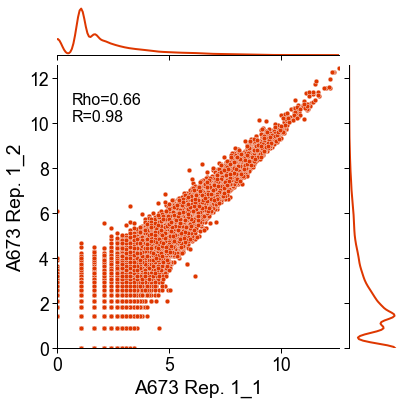

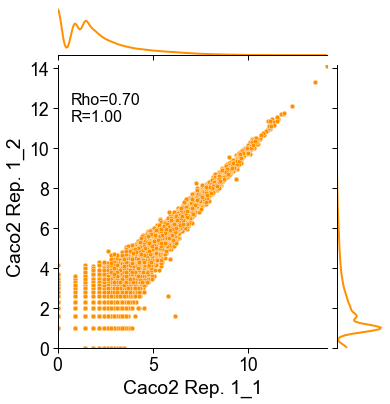

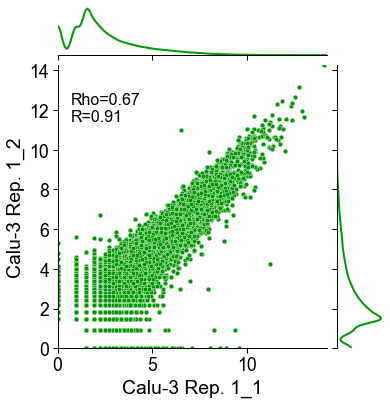

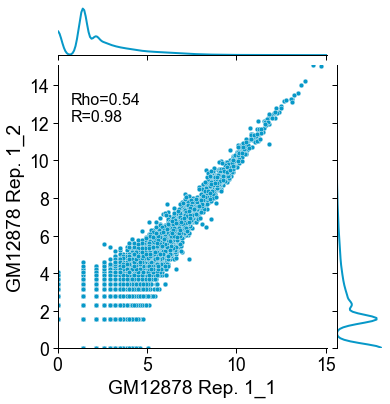

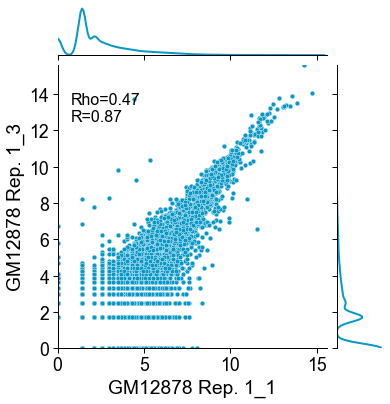

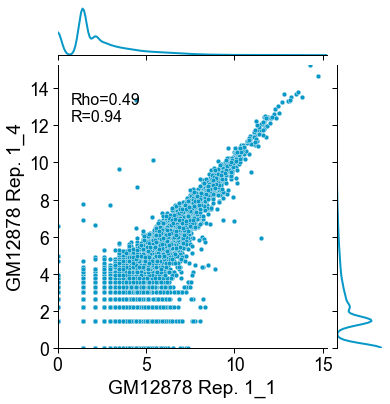

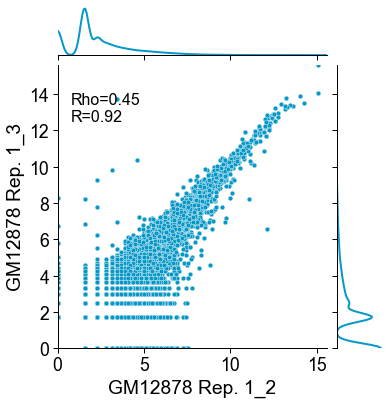

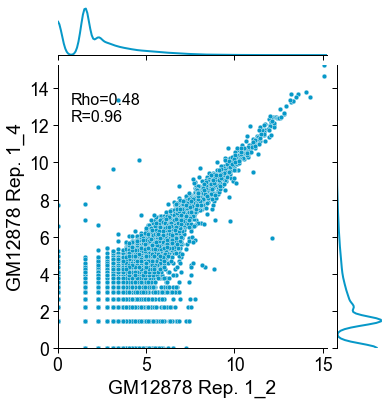

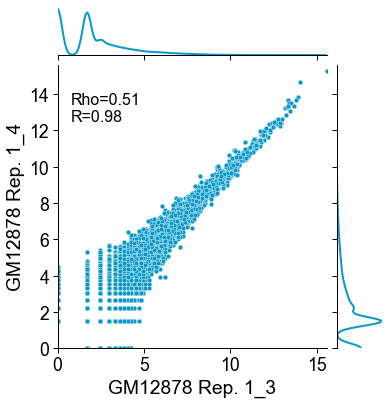

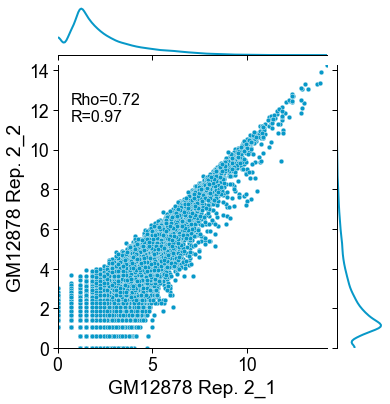

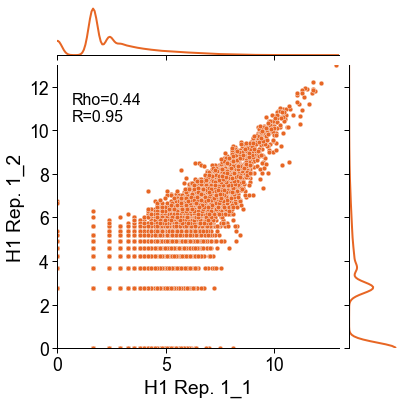

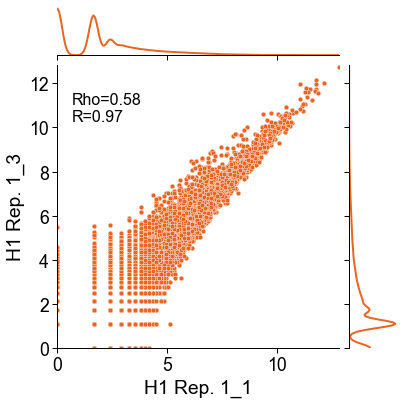

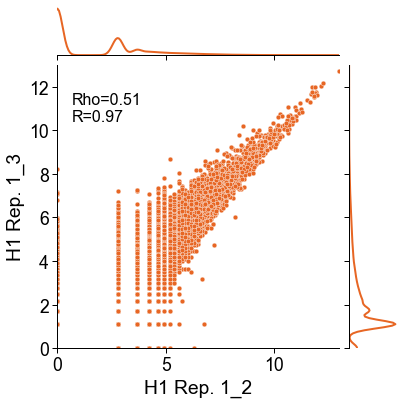

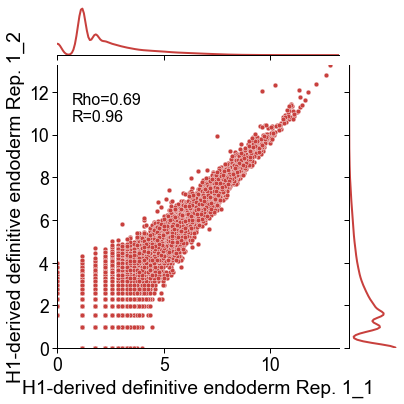

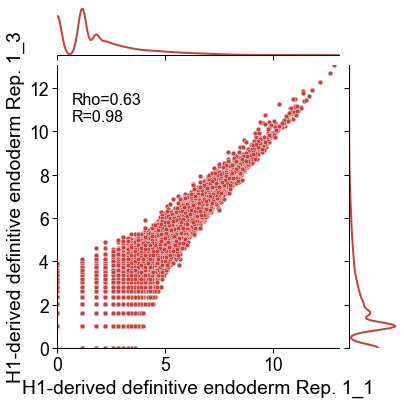

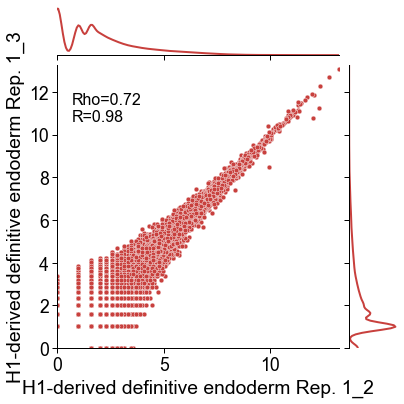

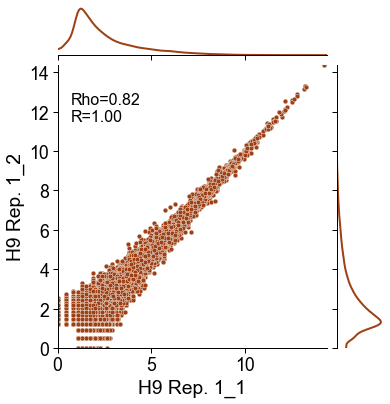

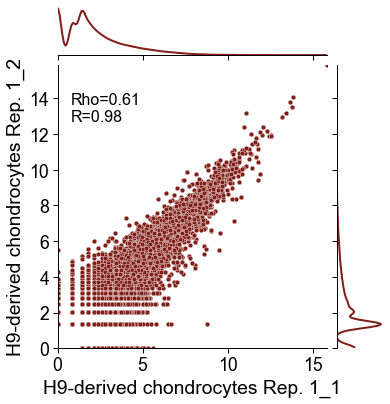

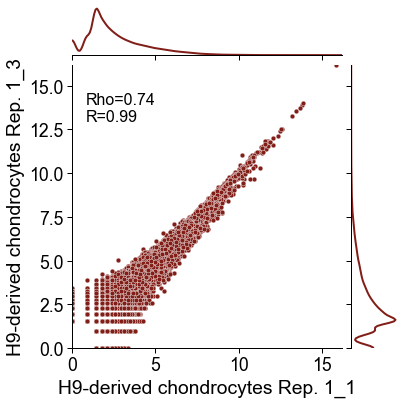

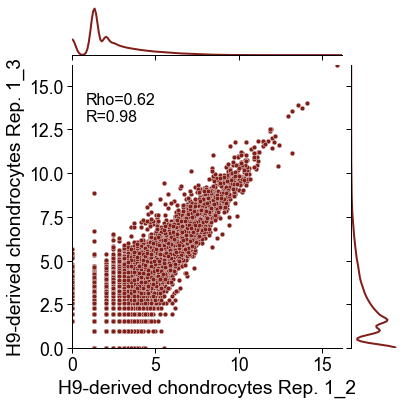

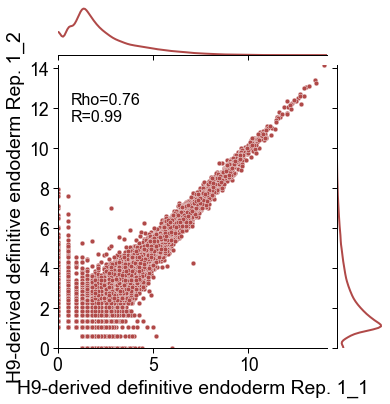

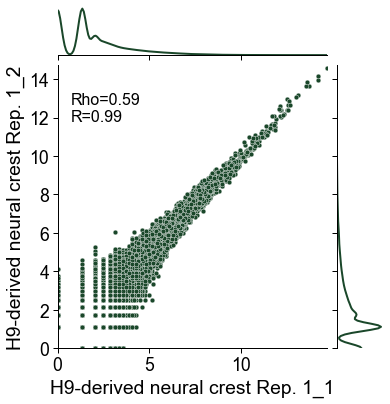

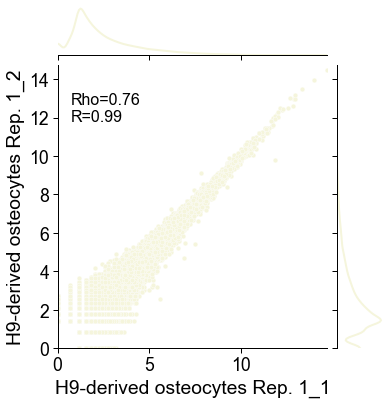

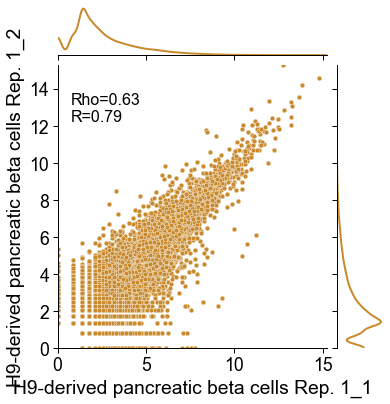

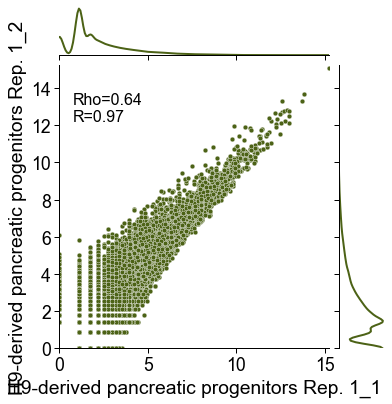

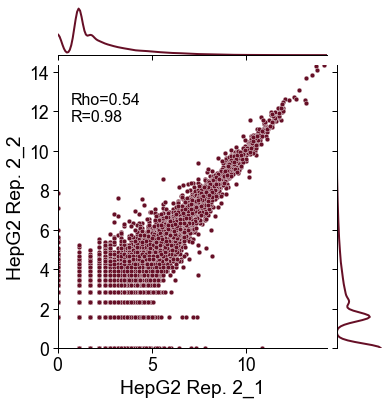

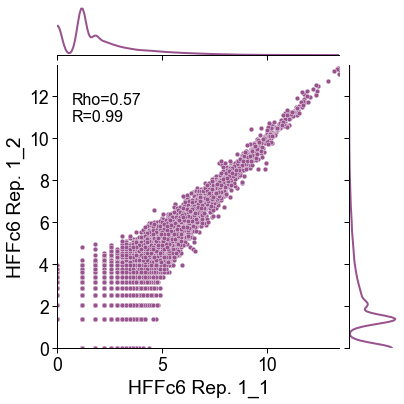

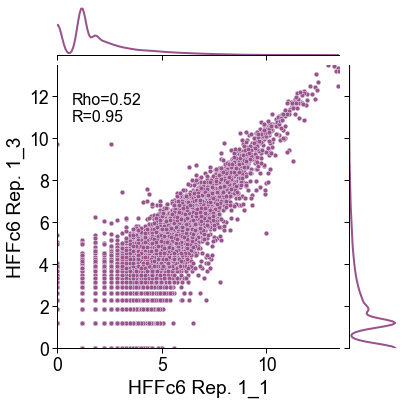

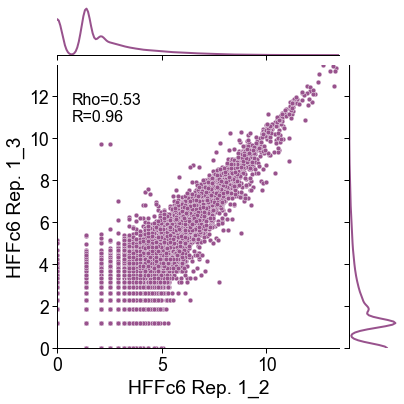

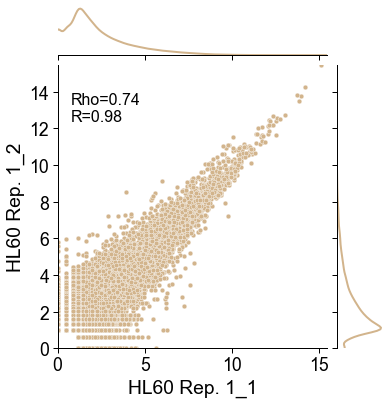

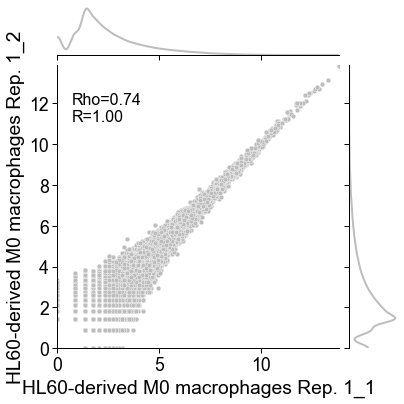

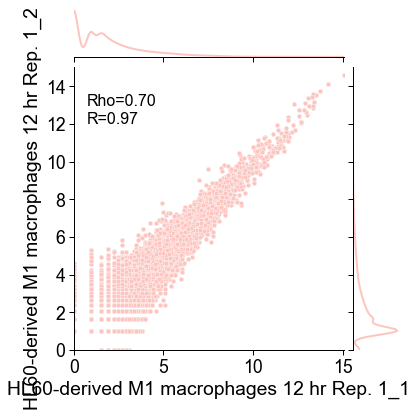

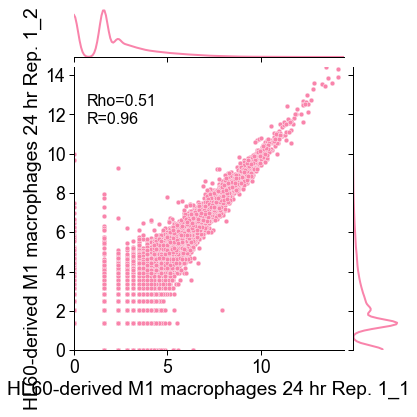

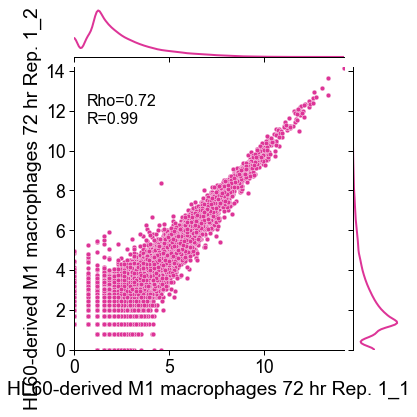

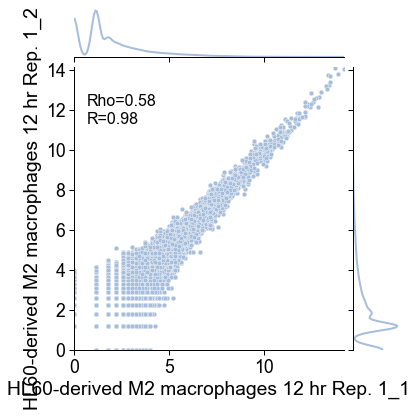

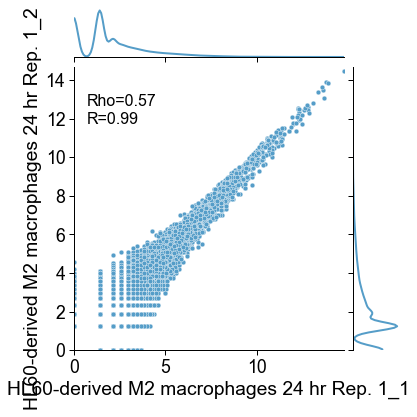

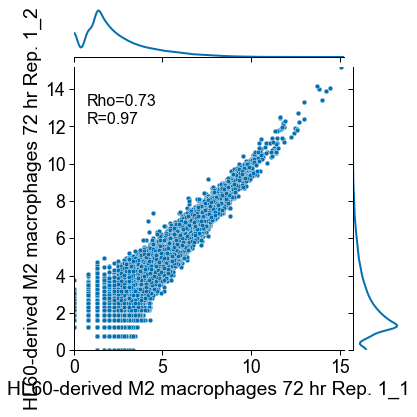

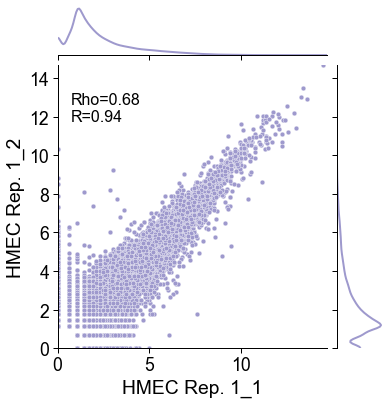

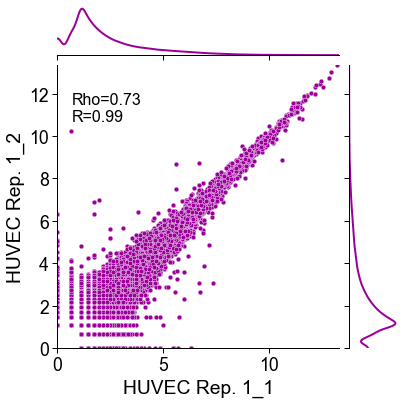

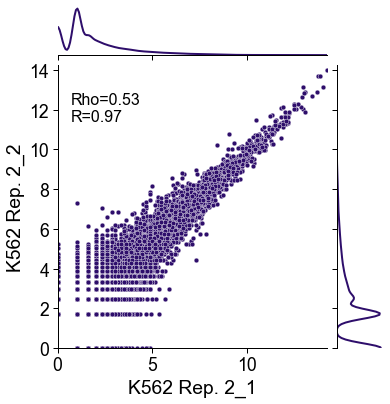

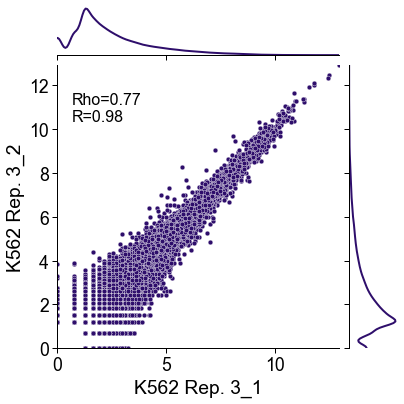

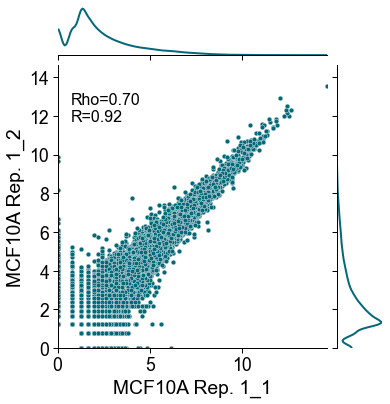

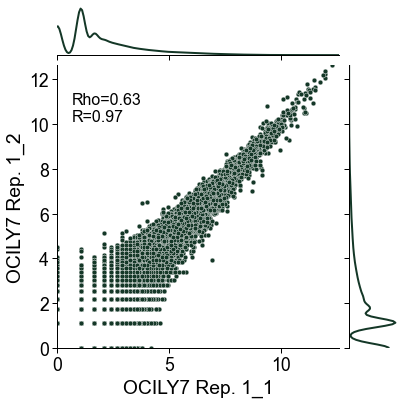

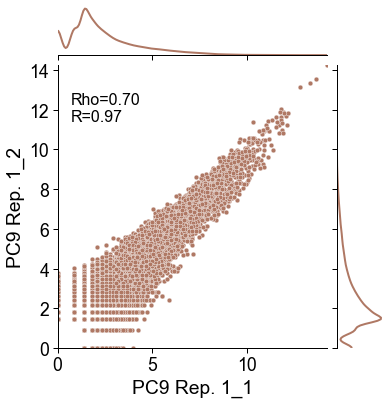

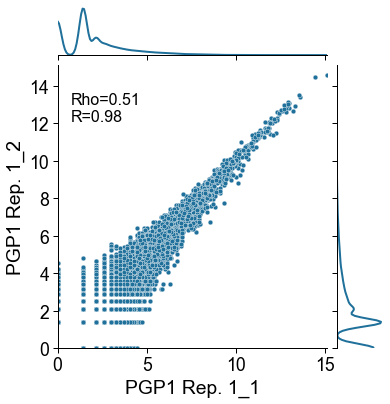

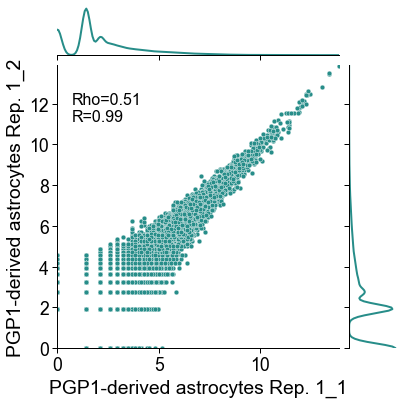

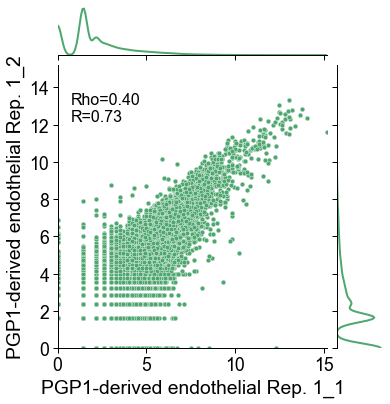

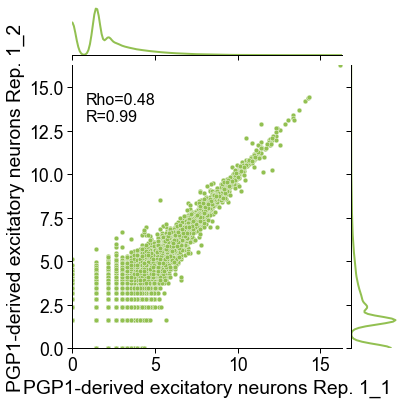

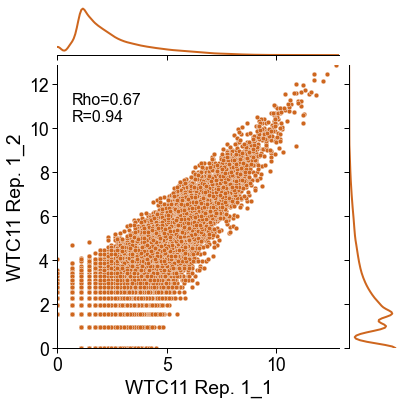

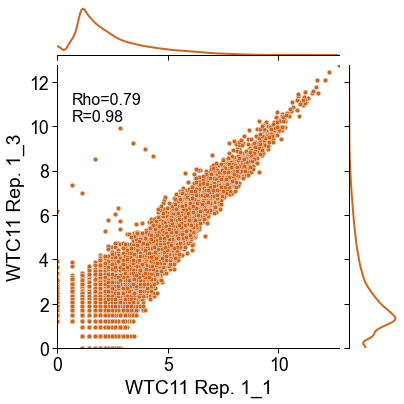

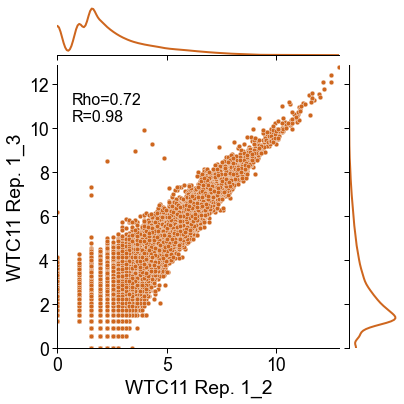

In [43]:
fnames = []
samples = []
d1s = []
d2s = []
rhos = []
rs = []
for i, p in enumerate(all_pairs):
    sample = p[0].rsplit('_', 2)[0]
    x = p[0]
    y = p[1]
    
    temp = df[[x, y]].copy(deep=True)
    # temp['sample'] = sample
    
    # remove transcripts expressed >1 TPM
    temp_det = det_df.transpose()[[x, y]].copy(deep=True)
    det_tids = temp_det.loc[temp_det.any(axis=1)].index.tolist()
    temp = temp.loc[det_tids]

    rho, p = st.spearmanr(temp[x].tolist(), temp[y].tolist())
    r, p2 = st.pearsonr(temp[x].tolist(), temp[y].tolist())
    samples.append(sample)
    rhos.append(rho)
    rs.append(r)
    d1s.append(x)
    d2s.append(y)
    
    # add pseudocounts and plot log2tpm
    temp = temp+1
    temp = np.log2(temp)
    lim = (0, max(temp[x].max(), temp[y].max()))
    
    g = sns.JointGrid(data=temp, x=x, y=y, ylim=lim, xlim=lim)
    g.plot_joint(sns.scatterplot, color=c_dict[sample])
    g.plot_marginals(sns.kdeplot, color=c_dict[sample], linewidth=2)
    
    # g.plot_marginals(sns.distplot, kde=True)
    # g = sns.jointplot(temp, x=x, y=y, color=c_dict[sample],
    #                   ylim=lim, xlim=lim, kind='kde', marginal_kws={'linewidth':2}) 
    for d, ax in zip([x,y], ['x','y']):
        label = meta_df.loc[meta_df.dataset==d, 'sample_display'].values[0]
        label += f" Rep. {'_'.join(d.rsplit('_',2)[-2:])}"
        if ax == 'x':
            g.ax_joint.set_xlabel(label)
        elif ax == 'y':
            g.ax_joint.set_ylabel(label)
    plt.text(.05, .8, 'Rho={:.2f}\nR={:.2f}'.format(rho,r), transform=g.ax_joint.transAxes,
              size=16)
    fname = f'figures/biorep_transcript_corr_{x}_{y}.png'
    plt.savefig(fname)
    fnames.append(fname)
    # plt.show()
    # plt.close(g)
    # break

In [44]:
import matplotlib.image as mpimg

56


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6


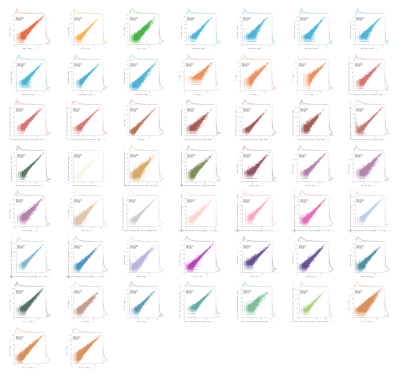

In [45]:
# mm = 0.0393701  # mm in inches
# f, axarr = plt.subplots(8, 7, squeeze=True, figsize=(180*mm, 170*mm))
# axs = []
# for i in range(axarr.shape[0]):
#     for j in range(axarr.shape[1]):
#         axs.append(axarr[i][j])
# print(len(axs))
# for i, f in enumerate(fnames):
#     axs[i].imshow(mpimg.imread(f))
# # plt.show()
# plt.savefig('figures/maybe.pdf')

mm = 0.0393701  # mm in inches
f, axarr = plt.subplots(8, 7, squeeze=True, figsize=(180*mm, 170*mm))
axs = []
for i in range(axarr.shape[0]):
    for j in range(axarr.shape[1]):
        axs.append(axarr[i][j])
print(len(axs))
for i, f in enumerate(fnames):
    axs[i].imshow(mpimg.imread(f))

for j in axs:
    j.spines['right'].set_visible(False)
    j.spines['top'].set_visible(False)
    j.spines['left'].set_visible(False)
    j.spines['bottom'].set_visible(False)
    j.set_xticklabels('')
    j.set_yticklabels('')
    j.set_xticks([])
    j.set_yticks([])
    
# plt.show()

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/maybe.pdf', dpi=1000, layout='tight')

# Plot dist of the correlations

In [63]:
df = pd.DataFrame()
df['sample'] = samples
df['spearman_rho'] = rhos
df['pearson_r'] = rs
df['dataset_1'] = d1s
df['dataset_2'] = d2s

In [64]:
temp = df[['sample', 'dataset_1', 'dataset_2', 'spearman_rho']].rename({'spearman_rho':'corr_metric'}, axis=1)
temp['corr_type'] = 'spearman'
temp2 = df[['sample', 'dataset_1', 'dataset_2', 'pearson_r']].rename({'pearson_r':'corr_metric'}, axis=1)
temp2['corr_type'] = 'pearson'
df = pd.concat([temp, temp2], axis=0)

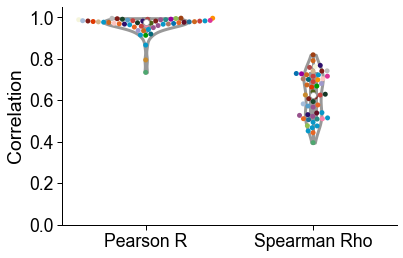

In [65]:
c_dict, order = get_biosample_colors()

cats = ['pearson', 'spearman']
cats_labels = ['Pearson R', 'Spearman Rho']
df['corr_type'] = df['corr_type'].astype('category')
df['corr_type'] = df['corr_type'].cat.reorder_categories(cats, ordered=True)
df = df.sort_values(by='corr_type')

ax2 = sns.swarmplot(df, x='corr_type', y='corr_metric')

n_t = len(df.loc[df.corr_type=='spearman'].index)
n_c = len(df.loc[df.corr_type=='pearson'].index)
d = {n_t: 'spearman', n_c: 'pearson'}
for i, cl in zip(range(len(ax2.collections)), cats):
    if isinstance(ax2.collections[i], mpl.collections.PathCollection):
        # try: 
        # cl = d[len(ax2.collections[i].properties()['facecolor'])]
        # except:
        #     continue
        colors = [c_dict[c] for c in df.loc[df.corr_type==cl, 'sample'].tolist()]
        ax2.collections[i].set_color(colors)
# ax.get_legend().remove()

ax = sns.violinplot(df, x='corr_type', y='corr_metric',
                    linewidth=3, fillcolor=None, cut=0,
                    width=0.5, color='w', ax=ax2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(ylabel='Correlation', xlabel='', ylim=(0,1.05))
ax.set_xticklabels(cats_labels)

fname = 'figures/transcript_corr_summary.pdf'
plt.savefig(fname, dpi=500)

In [66]:
t = 'pearson'
min_corr = .9
temp = df.loc[df.corr_type == t].copy(deep=True)
n = len(temp.index)
n_num = len(temp.loc[temp.corr_metric>=min_corr].index)
print(f'{perc(n_num,n):.2f}% ({n_num}/{n}) of rep. pairs have {t} >= {min_corr}')

94.12% (48/51) of rep. pairs have pearson >= 0.9


In [67]:
df


,sample,dataset_1,dataset_2,corr_metric,corr_type
50,wtc11,wtc11_1_2,wtc11_1_3,0.975772,pearson
22,h9_osteocyte,h9_osteocyte_1_1,h9_osteocyte_1_2,0.988951,pearson
21,h9_neural_crest,h9_neural_crest_1_1,h9_neural_crest_1_2,0.991173,pearson
20,h9_de,h9_de_1_1,h9_de_1_2,0.990836,pearson
19,h9_chondro,h9_chondro_1_2,h9_chondro_1_3,0.982685,pearson
...,...,...,...,...,...
28,hffc6,hffc6_1_2,hffc6_1_3,0.526945,spearman
27,hffc6,hffc6_1_1,hffc6_1_3,0.522371,spearman
26,hffc6,hffc6_1_1,hffc6_1_2,0.567094,spearman
36,hl60_m2_72hr,hl60_m2_72hr_1_1,hl60_m2_72hr_1_2,0.729159,spearman


## Which datasets have bad correlations?

In [68]:
meta = pd.read_csv(lib_meta, sep='\t')
meta = meta[['platform', 'dataset', 'reads_post_talon']]
# meta.head()

In [69]:
meta.rename({'dataset': 'dataset_1'}, axis=1, inplace=True)
df = df.merge(meta[['dataset_1', 'platform', 'reads_post_talon']], how='left',
                  on='dataset_1', 
                  suffixes=('', '_1'))
df.rename({'reads_post_talon': 'reads_post_talon_1'}, axis=1, inplace=True)
meta.rename({'dataset_1': 'dataset_2'}, axis=1, inplace=True)
df = df.merge(meta[['dataset_2', 'reads_post_talon']], how='left',
                  on='dataset_2', 
                  suffixes=('', '_2'))
df.rename({'reads_post_talon': 'reads_post_talon_2'}, axis=1, inplace=True)

# temp = temp.merge(meta[['dataset', 'reads_post_talon']], how='left',
#                   left_on='dataset_2',
#                   right_on='dataset')
# temp
# # temp.loc[temp.corr_metric<0.8]
# # temp.loc[temp.corr_metric<0.8][['dataset_2', 'dataset_2', 'corr_metric', 'platform',
# #                                 'reads_post_talon_1', 'reads_post_talon_2']]

df['read_diff'] = (df.reads_post_talon_1-df.reads_post_talon_2).abs()
df.loc[df.corr_metric<0.8]

,sample,dataset_1,dataset_2,corr_metric,corr_type,platform,reads_post_talon_1,reads_post_talon_2,read_diff
11,h9_panc_beta,h9_panc_beta_1_1,h9_panc_beta_1_2,0.794585,pearson,Pacific Biosciences Sequel II,1567044,1614116,47072
29,pgp1_endo,pgp1_endo_1_1,pgp1_endo_1_2,0.734578,pearson,Pacific Biosciences Sequel,696271,601739,94532
51,a673,a673_1_1,a673_1_2,0.663529,spearman,Pacific Biosciences Sequel II,1330194,1707207,377013
52,wtc11,wtc11_1_1,wtc11_1_2,0.673821,spearman,Pacific Biosciences Sequel II,2332639,1358180,974459
53,h9_neural_crest,h9_neural_crest_1_1,h9_neural_crest_1_2,0.593668,spearman,Pacific Biosciences Sequel II,865088,1137068,271980
54,h9_de,h9_de_1_1,h9_de_1_2,0.758454,spearman,Pacific Biosciences Sequel II,2459464,2333663,125801
55,h9_chondro,h9_chondro_1_2,h9_chondro_1_3,0.615676,spearman,Pacific Biosciences Sequel II,887837,1301572,413735
56,h9_chondro,h9_chondro_1_1,h9_chondro_1_3,0.740804,spearman,Pacific Biosciences Sequel II,1552738,1301572,251166
57,h9_chondro,h9_chondro_1_1,h9_chondro_1_2,0.607506,spearman,Pacific Biosciences Sequel II,1552738,887837,664901
59,h1_de,h1_de_1_2,h1_de_1_3,0.716070,spearman,Pacific Biosciences Sequel II,1366812,1329159,37653


In [70]:
df

,sample,dataset_1,dataset_2,corr_metric,corr_type,platform,reads_post_talon_1,reads_post_talon_2,read_diff
0,wtc11,wtc11_1_2,wtc11_1_3,0.975772,pearson,Pacific Biosciences Sequel II,1358180,2851975,1493795
1,h9_osteocyte,h9_osteocyte_1_1,h9_osteocyte_1_2,0.988951,pearson,Pacific Biosciences Sequel II,2027523,1600065,427458
2,h9_neural_crest,h9_neural_crest_1_1,h9_neural_crest_1_2,0.991173,pearson,Pacific Biosciences Sequel II,865088,1137068,271980
3,h9_de,h9_de_1_1,h9_de_1_2,0.990836,pearson,Pacific Biosciences Sequel II,2459464,2333663,125801
4,h9_chondro,h9_chondro_1_2,h9_chondro_1_3,0.982685,pearson,Pacific Biosciences Sequel II,887837,1301572,413735
...,...,...,...,...,...,...,...,...,...
97,hffc6,hffc6_1_2,hffc6_1_3,0.526945,spearman,Pacific Biosciences Sequel,826024,1039934,213910
98,hffc6,hffc6_1_1,hffc6_1_3,0.522371,spearman,Pacific Biosciences Sequel,1052582,1039934,12648
99,hffc6,hffc6_1_1,hffc6_1_2,0.567094,spearman,Pacific Biosciences Sequel,1052582,826024,226558
100,hl60_m2_72hr,hl60_m2_72hr_1_1,hl60_m2_72hr_1_2,0.729159,spearman,Pacific Biosciences Sequel II,1814493,2036266,221773


<AxesSubplot:xlabel='corr_metric', ylabel='read_diff'>

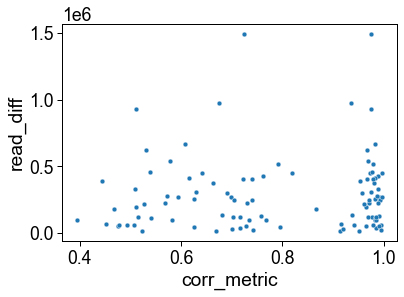

In [71]:
sns.scatterplot(df, x='corr_metric', y='read_diff')

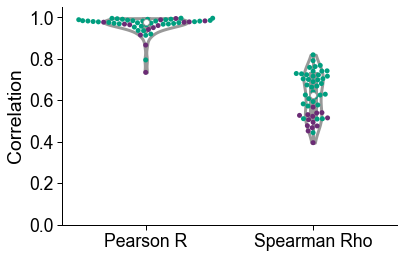

In [72]:
# c_dict, order = get_biosample_colors(species='mouse')
def get_platform_colors():
    c_dict = {'Pacific Biosciences Sequel II': '#009e7f',
              'Pacific Biosciences Sequel': '#6b2c75'}
    order = ['Pacific Biosciences Sequel',
             'Pacific Biosciences Sequel II']    
    return c_dict, order

c_dict, order = get_platform_colors()

cats = ['pearson', 'spearman']
cats_labels = ['Pearson R', 'Spearman Rho']
df['corr_type'] = df['corr_type'].astype('category')
df['corr_type'] = df['corr_type'].cat.reorder_categories(cats, ordered=True)
df = df.sort_values(by='corr_type')

ax2 = sns.swarmplot(df, x='corr_type', y='corr_metric')

n_t = len(df.loc[df.corr_type=='spearman'].index)
n_c = len(df.loc[df.corr_type=='pearson'].index)
d = {n_t: 'spearman', n_c: 'pearson'}
for i, cl in zip(range(len(ax2.collections)), cats):
    if isinstance(ax2.collections[i], mpl.collections.PathCollection):
        # try: 
        # cl = d[len(ax2.collections[i].properties()['facecolor'])]
        # except:
        #     continue
        colors = [c_dict[c] for c in df.loc[df.corr_type==cl, 'platform'].tolist()]
        ax2.collections[i].set_color(colors)
# ax.get_legend().remove()

ax = sns.violinplot(df, x='corr_type', y='corr_metric',
                    linewidth=3, fillcolor=None, cut=0, width=0.5, color='w', ax=ax2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(ylabel='Correlation', xlabel='', ylim=(0,1.05))
ax.set_xticklabels(cats_labels)

fname = 'figures/transcript_corr_summary_platform.pdf'
plt.savefig(fname, dpi=500)